In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE 

In [3]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import cv2
import shutil
from imutils import paths
import stat

In [4]:
# initialize the path to the *original* input directory of images
ORIG_INPUT_DATASET = 'C:/Users/Nasha Hikmatia/PA/PA AGUSTUS/BISINDO'
 
# initialize the base path to the *new* directory that will contain
# our images after computing the training and testing split
BASE_PATH = "8020"
 
# derive the training, validation, and testing directories
TRAIN_PATH = os.path.sep.join([BASE_PATH, "training60"])
VAL_PATH = os.path.sep.join([BASE_PATH, "validation20"])
TEST_PATH = os.path.sep.join([BASE_PATH, "testing20"])
 
train_split = 0.8
val_split = 0.2

In [5]:
# grab the paths to all input images in the original input directory
# and shuffle them
image_path = list(paths.list_images(ORIG_INPUT_DATASET))
random.seed(42)
random.shuffle(image_path)

In [6]:
i = int(train_split * len(image_path))
train_path = image_path[:i]
test_path = image_path[i:]

i = int(val_split * len(train_path))
val_path = train_path[:i]
train_path = train_path[i:]

In [7]:
datasets = [
    ("training60", train_path, TRAIN_PATH),
    ("validation20", val_path, VAL_PATH),
    ("testing20", test_path, TEST_PATH)
]

In [8]:
# loop over the datasets
for (dType, imagePaths, baseOutput) in datasets:
    # show which data split we are creating
    print("[INFO] building '{}' split".format(dType))
 
    # if the output base output directory does not exist, create it
    if not os.path.exists(baseOutput):
        print("[INFO] 'creating {}' directory".format(baseOutput))
        os.makedirs(baseOutput)
 
    # loop over the input image paths
    for inputPath in imagePaths:
        # extract the filename of the input image along with its
        # corresponding class label
        filename = inputPath.split(os.path.sep)[-1]
        label = inputPath.split(os.path.sep)[-2]
 
        # build the path to the label directory
        labelPath = os.path.sep.join([baseOutput, label])
 
        # if the label output directory does not exist, create it
        if not os.path.exists(labelPath):
            print("[INFO] 'creating {}' directory".format(labelPath))
            os.makedirs(labelPath)
    
        # construct the path to the destination image and then copy
        # the image itself
        p = os.path.sep.join([labelPath, filename])
        shutil.copy2(inputPath, p)

[INFO] building 'training60' split
[INFO] building 'validation20' split
[INFO] building 'testing20' split


In [9]:
import pathlib

train_dir = pathlib.Path('C:/Users/Nasha Hikmatia/PA/PA AGUSTUS/8020/training60')
val_dir = pathlib.Path('C:/Users/Nasha Hikmatia/PA/PA AGUSTUS/8020/validation20')
test_dir = pathlib.Path('C:/Users/Nasha Hikmatia/PA/PA AGUSTUS/8020/testing20')

In [10]:
total_train = len(list(train_dir.glob('*/*')))
total_val = len(list(val_dir.glob('*/*')))
total_test = len(list(test_dir.glob('*/*')))

print("Total training:", total_train)
print("Total validation:", total_val)
print("Total testing:", total_test)

Total training: 4608
Total validation: 1152
Total testing: 1440


In [11]:
CLASS_NAMES = np.array([item.name for item in train_dir.glob('*')])
CLASS_NAMES

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'KAMU', 'L',
       'M', 'N', 'NAMA', 'O', 'P', 'Q', 'R', 'S', 'SAYA', 'SIAPA', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U5')

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [13]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(8):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [14]:
BATCH_SIZE = 8
IMG_SIZE = 224

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

#image_gen_train = ImageDataGenerator(
      #preprocessing_function=preprocess_input)
    
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.06,
    shear_range=0.1,
    zoom_range=0.01,
    fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=str(train_dir),
                                                     target_size=(IMG_SIZE,IMG_SIZE),
                                                     class_mode='categorical',
                                                     shuffle=True)

                                                     #seed=42)

Found 4608 images belonging to 30 classes.


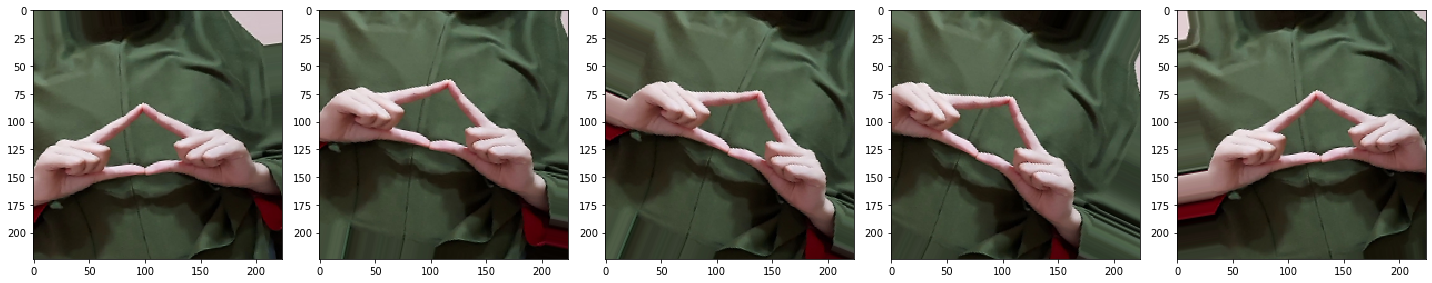

In [16]:
augmented_images = [train_data_gen [3][0][0] for i in range(5)]
plotImages(augmented_images)

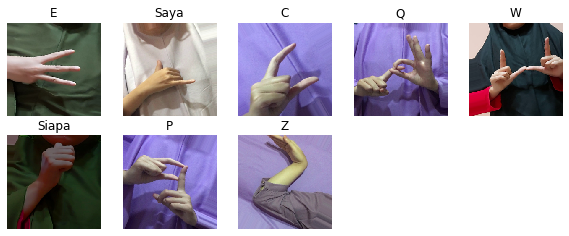

In [17]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [18]:
#image_gen_val = ImageDataGenerator(preprocessing_function=preprocess_input)

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=str(val_dir),
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 class_mode='categorical')

Found 1152 images belonging to 30 classes.


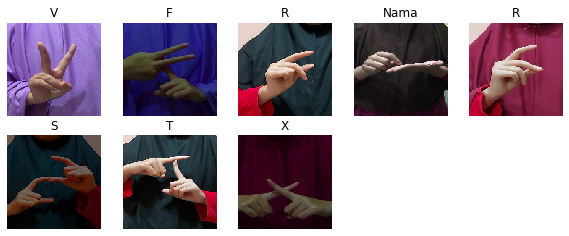

In [19]:
imgval_batch, lblval_batch = next(val_data_gen)
show_batch(imgval_batch, lblval_batch)

In [20]:
image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=str(test_dir),
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 class_mode=None,
                                                 shuffle=False)

Found 1440 images belonging to 30 classes.


### Create the base model from the pre-trained convnets 

In [21]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), 
                                               weights='imagenet',include_top=False)

#Freeze the Convolutional base
base_model.trainable=False

In [22]:
feature_map_batch = base_model(image_batch)
print(feature_map_batch.shape)

(8, 7, 7, 1280)


In [23]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [24]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense((len(CLASS_NAMES)), activation='softmax')])

### Compile the model 

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                38430     
Total params: 2,296,414
Trainable params: 38,430
Non-trainable params: 2,257,984
_________________________________________________________________


In [27]:
len(model.trainable_variables)

2

### Train the model

In [28]:
steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE)))
steps_per_epoch

576

In [29]:
validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
validation_steps

144

In [30]:
def plot_to_image(figure):
  """Converts the matplotlib plot specified by 'figure' to a PNG image and
  returns it. The supplied figure is closed and inaccessible after this call."""
  # Save the plot to a PNG in memory.
  buf = io.BytesIO()
  plt.savefig(buf, format='png')
  # Closing the figure prevents it from being displayed directly inside
  # the notebook.
  plt.close(figure)
  buf.seek(0)
  # Convert PNG buffer to TF image
  image = tf.image.decode_png(buf.getvalue(), channels=4)
  # Add the batch dimension
  image = tf.expand_dims(image, 0)
  return image

In [31]:
import itertools
from datetime import datetime
import sklearn.metrics
import io
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes,
    normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    figure = plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(CLASS_NAMES))
    plt.xticks(tick_marks, CLASS_NAMES, rotation=45)
    plt.yticks(tick_marks, CLASS_NAMES)

    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 #fontsize = 12,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
logdir = "logs/602020" + datetime.now().strftime("%Y%m%d-%H%M%S")

# Define the basic TensorBoard callback.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1, profile_batch = 100000000)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred_raw = model.predict(val_data_gen)
  test_pred = np.argmax(test_pred_raw, axis=1)

  # Calculate the confusion matrix.
  cm = sklearn.metrics.confusion_matrix(val_data_gen.classes, test_pred)
  # Log the confusion matrix as an image summary.
  figure = plot_confusion_matrix(cm, CLASS_NAMES)
  cm_image = plot_to_image(figure)

  # Log the confusion matrix as an image summary.
  with file_writer_cm.as_default():
    tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [33]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    epochs=epochs,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
    callbacks=[cm_callback,tensorboard_callback]
)

Epoch 1/50
576/576 [==============================] - 415s 721ms/step - loss: 3.0294 - accuracy: 0.1912 - val_loss: 2.9245 - val_accuracy: 0.1354
Epoch 2/50
576/576 [==============================] - 402s 698ms/step - loss: 2.2229 - accuracy: 0.5100 - val_loss: 2.5691 - val_accuracy: 0.2188
Epoch 3/50
576/576 [==============================] - 410s 712ms/step - loss: 1.6802 - accuracy: 0.7072 - val_loss: 2.3848 - val_accuracy: 0.2552
Epoch 4/50
576/576 [==============================] - 404s 702ms/step - loss: 1.3565 - accuracy: 0.7778 - val_loss: 2.2338 - val_accuracy: 0.2943
Epoch 5/50
576/576 [==============================] - 403s 700ms/step - loss: 1.0869 - accuracy: 0.8394 - val_loss: 2.1346 - val_accuracy: 0.3090
Epoch 6/50
576/576 [==============================] - 403s 700ms/step - loss: 0.9144 - accuracy: 0.8663 - val_loss: 2.1304 - val_accuracy: 0.3108
Epoch 7/50
576/576 [==============================] - 403s 701ms/step - loss: 0.7912 - accuracy: 0.8815 - val_loss: 2.0575 -

In [34]:
train_acc = model.evaluate(train_data_gen)
val_acc = model.evaluate(val_data_gen)
print(train_acc)
print(val_acc)

144/144 [==============================] - 42s 288ms/step - loss: 1.7576 - accuracy: 0.4852
[2.162145027787321, 0.4001736]
[1.7576498033271895, 0.48524305]


In [47]:
test_acc = model.evaluate(test_data_gen, steps=test_steps)
print(test_acc)

  1/180 [..............................] - ETA: 2:09

IndexError: list index out of range

In [35]:
model.save('224_0_0001_80trainval_20test_100.h5')

In [36]:
from tensorflow import lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("224_0_0001_80trainval_20test_100.tflite", "wb").write(tflite_model)

9010012

In [37]:
test_steps=int(np.ceil(total_test / float(BATCH_SIZE)))
test_steps

180

In [38]:
test_data_gen.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'KAMU': 11,
 'L': 12,
 'M': 13,
 'N': 14,
 'NAMA': 15,
 'O': 16,
 'P': 17,
 'Q': 18,
 'R': 19,
 'S': 20,
 'SAYA': 21,
 'SIAPA': 22,
 'T': 23,
 'U': 24,
 'V': 25,
 'W': 26,
 'X': 27,
 'Y': 28,
 'Z': 29}

In [39]:
#Confusion Matrix and Classification Report
Y_pred = model.predict_generator(test_data_gen, test_steps)
y_pred = np.argmax(Y_pred, axis=1)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'KAMU', 'L',
       'M', 'N', 'NAMA', 'O', 'P', 'Q', 'R', 'S', 'SAYA', 'SIAPA', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z']
print('Classification Report')
print(classification_report(test_data_gen.classes, y_pred, target_names=labels, zero_division=0))

Classification Report
              precision    recall  f1-score   support

           A       0.96      0.58      0.72        45
           B       1.00      0.45      0.62        44
           C       0.85      0.31      0.45        55
           D       0.74      0.90      0.81        50
           E       0.00      0.00      0.00        35
           F       0.78      0.38      0.51        48
           G       1.00      0.70      0.82        40
           H       1.00      0.32      0.48        50
           I       1.00      0.31      0.47        59
           J       0.30      0.89      0.45        61
           K       0.96      0.46      0.62        52
        KAMU       0.53      0.39      0.45        49
           L       0.12      0.78      0.21        37
           M       1.00      0.07      0.13        43
           N       0.49      0.39      0.43        51
        NAMA       1.00      0.64      0.78        55
           O       1.00      0.62      0.77        48
     

Confusion matrix, without normalization


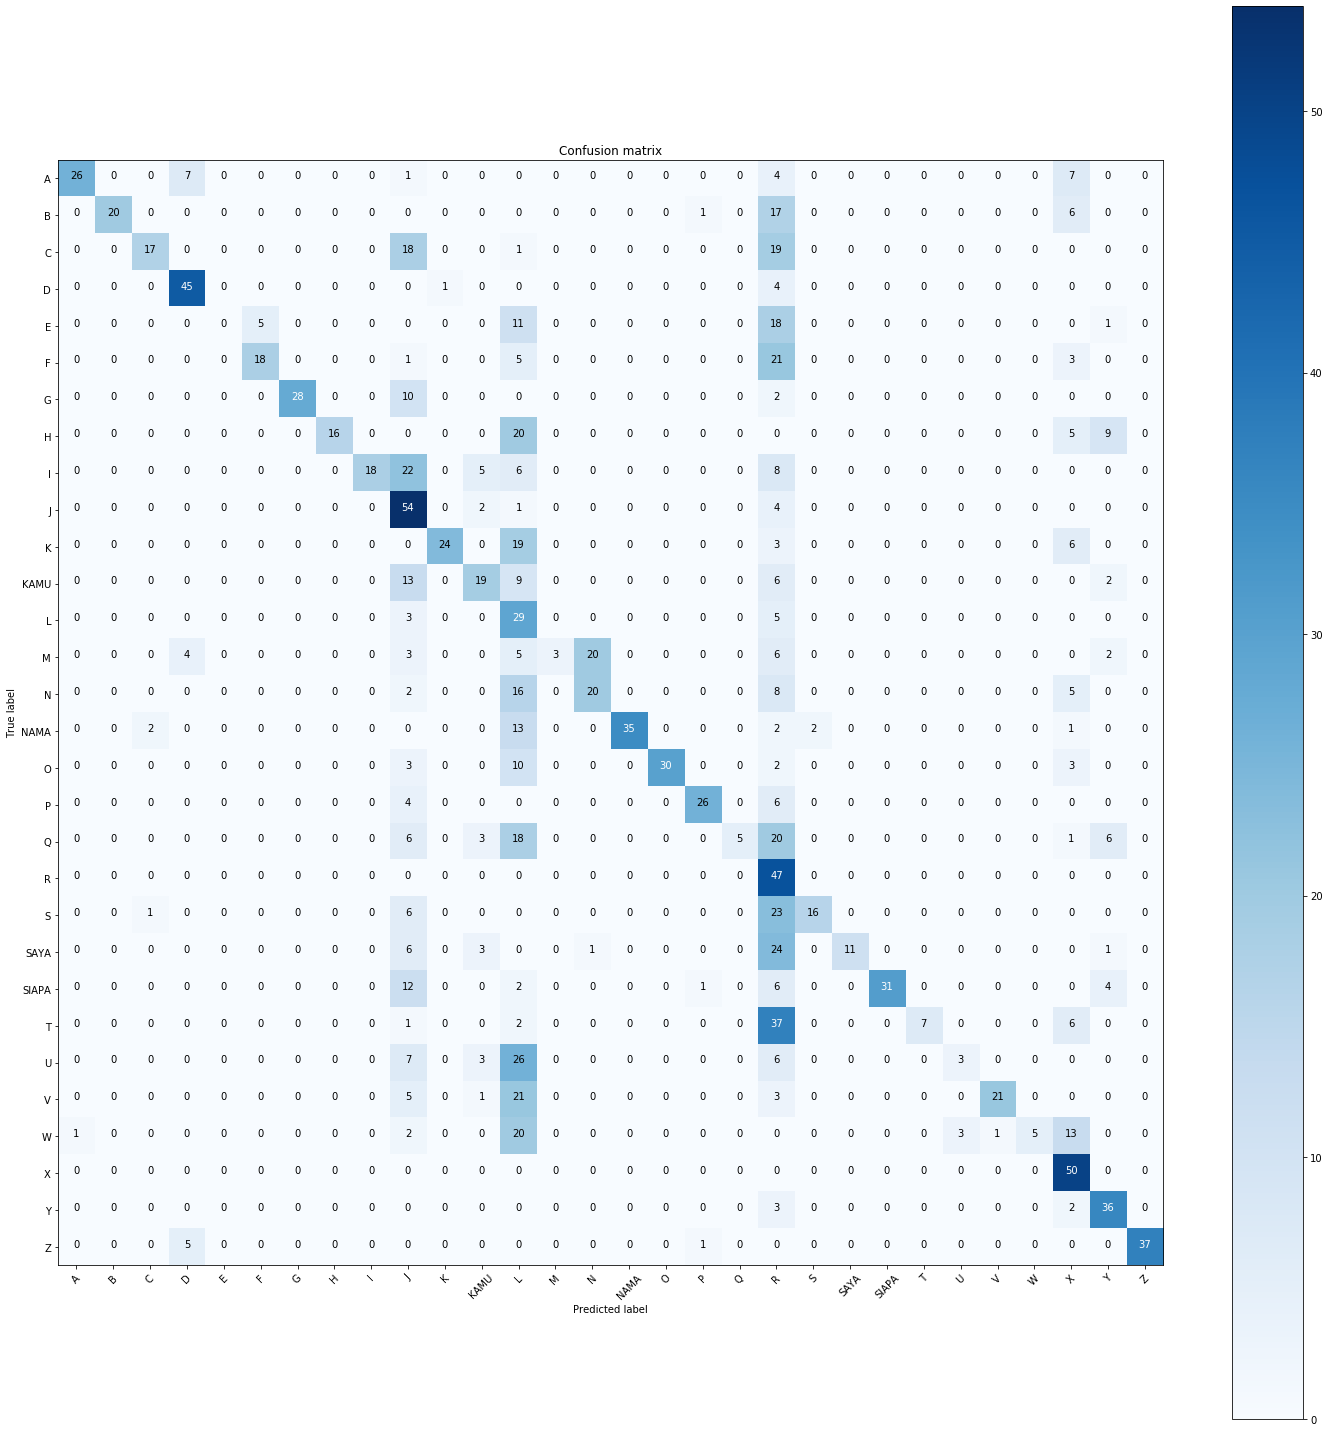

In [40]:
test_labels = test_data_gen.classes
predictions = model.predict_generator(test_data_gen, test_steps)
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))
test_data_gen.class_indices

plot_confusion_matrix(cm, labels)

In [ ]:
predictions = model.predict_generator(test_data_gen, test_steps)
y_pred = np.argmax(predictions, axis=1)
#labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'KAMU', 'L',
#       'M', 'N', 'NAMA', 'O', 'P', 'Q', 'R', 'S', 'SAYA', 'SIAPA', 'T',
#       'U', 'V', 'W', 'X', 'Y', 'Z']

true_classes = test_data_gen.classes
class_labels = list(test_data_gen.class_indices.keys())
print(class_labels)

print('Classification Report')
print(classification_report(test_data_gen.classes, y_pred, target_names=labels, zero_division=0))


cm = confusion_matrix(true_classes, y_pred)
plot_confusion_matrix(cm, true_classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'KAMU', 'L', 'M', 'N', 'NAMA', 'O', 'P', 'Q', 'R', 'S', 'SAYA', 'SIAPA', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Classification Report
              precision    recall  f1-score   support

           A       0.96      0.58      0.72        45
           B       1.00      0.45      0.62        44
           C       0.85      0.31      0.45        55
           D       0.74      0.90      0.81        50
           E       0.00      0.00      0.00        35
           F       0.78      0.38      0.51        48
           G       1.00      0.70      0.82        40
           H       1.00      0.32      0.48        50
           I       1.00      0.31      0.47        59
           J       0.30      0.89      0.45        61
           K       0.96      0.46      0.62        52
        KAMU       0.53      0.39      0.45        49
           L       0.12      0.78      0.21        37
           M       1.00      0.07      0.13        43
   

Confusion matrix, without normalization


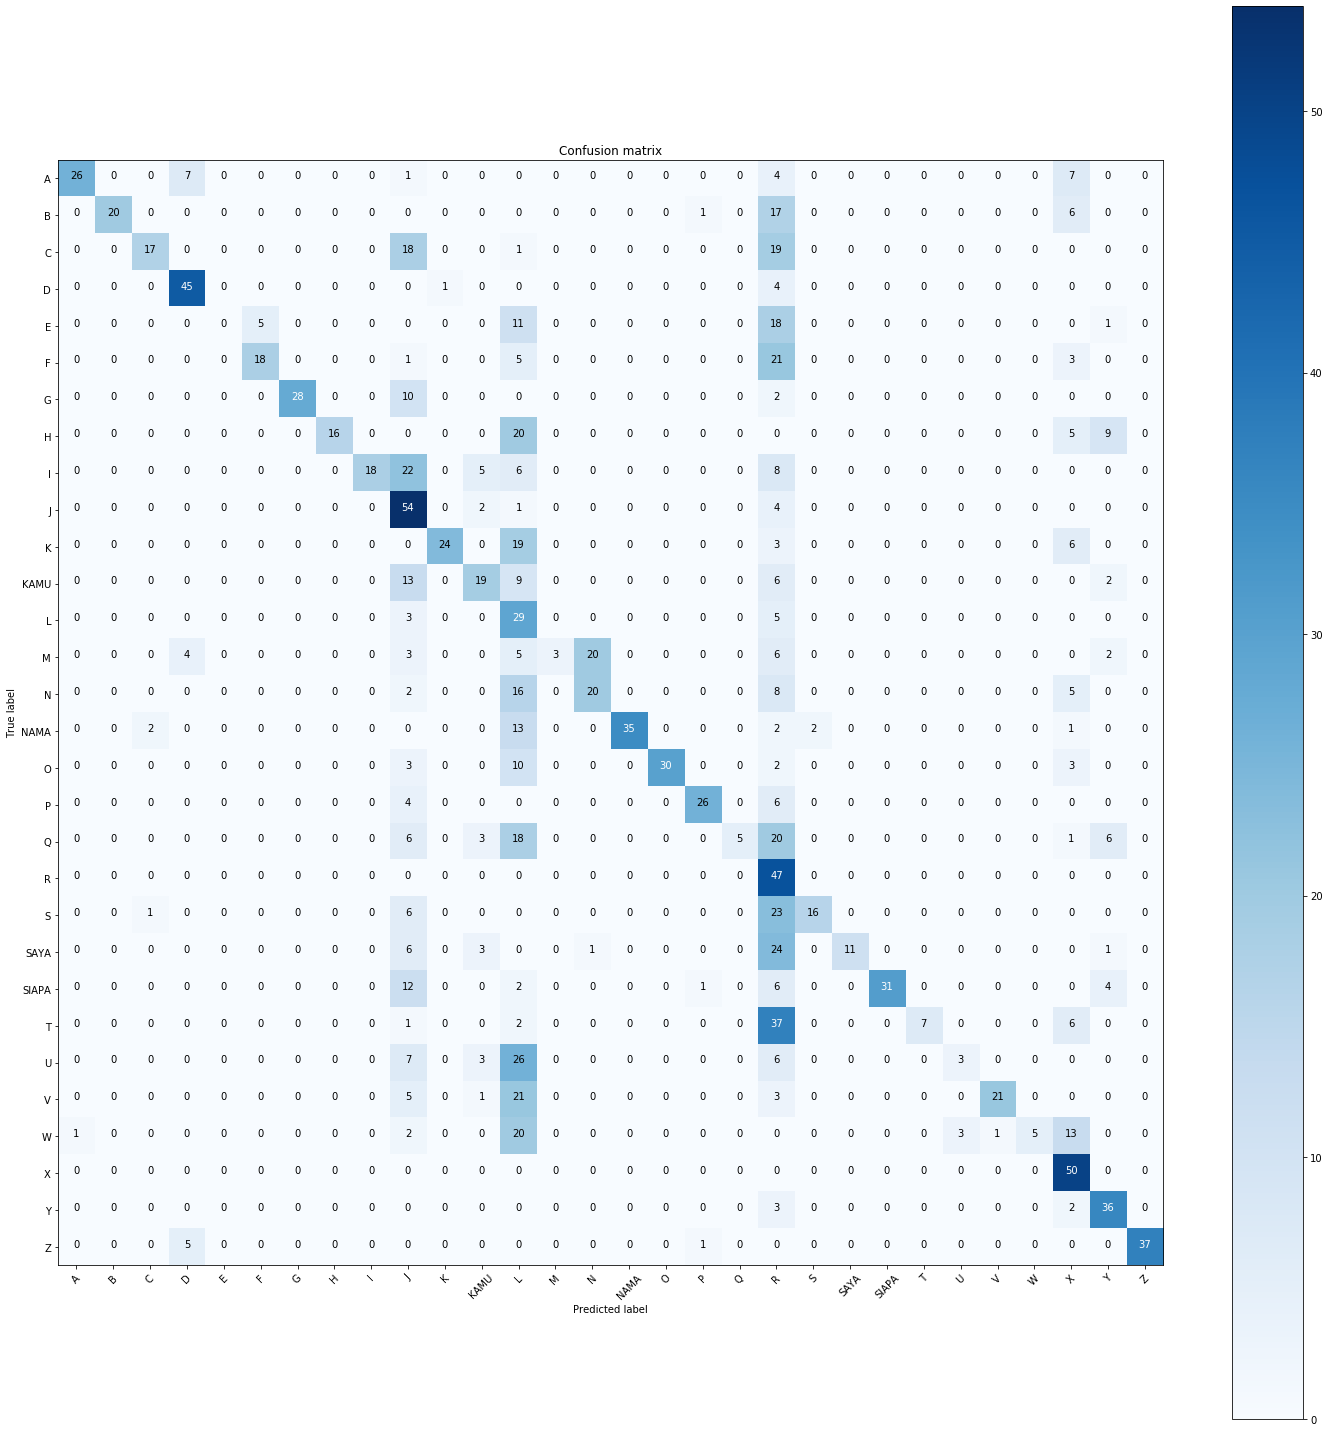

In [45]:
test_labels = test_data_gen.classes
predictions = model.predict_generator(test_data_gen, test_steps)
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))
test_data_gen.class_indices

plot_confusion_matrix(cm, test_labels)

In [ ]:
loss, acc = model.evaluate(test_data_gen,steps=test_steps,verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

In [ ]:
base_model.trainable = True


In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

In [ ]:
# fine tuning
for layer in base_model.layers[:100]:
  layer.trainable =  False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
len(model.trainable_variables)

In [ ]:
fine_tune_epochs = 10
total_epochs =  epochs + fine_tune_epochs

history_fine = model.fit(train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
                         validation_data=val_data_gen,
                         validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
                         callbacks=[cm_callback,tensorboard_callback])

In [ ]:
# Checkpoint callback
checkpoint_path = "training_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5)

In [ ]:
# Early stopping callback
es = keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-3,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=25,
        verbose=1)